<a href="https://colab.research.google.com/github/aimbesi1/CSC_4850-MachineLearning-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Housing Prices with Machine Learning Techniques

By Tony Imbesi

In [24]:
# Default imports

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Specific imports
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline, make_pipeline

Using the housing dataset from Kaggle: https://www.kaggle.com/datasets/mirbektoktogaraev/madrid-real-estate-market

In [25]:
df=pd.read_csv('houses_Madrid.csv', encoding='utf-8')
pd.set_option('display.max_columns', 100)

Let's print the columns of this dataset:

In [26]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parki

Let's also show the dataset:

In [27]:
df

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,Calle de la del Manojo de Rosas,True,Calle de la del Manojo de Rosas,NaN,NaN,4,False,NaN,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,666,NaN,False,129900,1856,True,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,"Calle del Talco, 68",False,Calle del Talco,68,NaN,1,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,722,NaN,False,144247,1535,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,Calle Pedro Jiménez,True,Calle Pedro Jiménez,NaN,NaN,Bajo,True,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,583,NaN,False,109900,1717,True,HouseType 1: Pisos,False,False,1955.0,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,Carretera de Villaverde a Vallecas,True,Carretera de Villaverde a Vallecas,NaN,NaN,4,False,NaN,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,1094,NaN,False,260000,2407,True,HouseType 1: Pisos,False,False,2003.0,NaN,NaN,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True,en trámite,True,NaN,NaN,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,21737,5,Ático en venta en Casco Histórico de Barajas,"Barajas, Madrid",78.0,NaN,2,2.0,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,4,False,NaN,Neighborhood 10: Casco Histórico de Barajas (3...,sale,1323,NaN,False,350000,4487,True,HouseType 5: Áticos,False,False,2020.0,False,True,NaN,True,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,en trámite,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
21738,21738,4,Piso en venta en Urb. Campo de las Naciones - ...,"Barajas, Madrid",96.0,83.0,2,2.0,NaN,NaN,NaN,NaN,Urb. Campo de las Naciones - Corralejos,True,Urb. Campo de las Naciones - Corralejos,NaN,NaN,3,False,NaN,Neighborhood 9: Campo de las Naciones-Corralej...,sale,1496,NaN,False,425000,4427,True,HouseType 1: Pisos,False,False,2002.0,False,True,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True,en t

In [28]:
df.describe()

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,portal,door,rent_price,rent_price_by_area,buy_price,buy_price_by_area,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_private_parking,has_public_parking,parking_price
count,21742.000000,21742.000000,21616.000000,8228.000000,21742.000000,21726.000000,1437.000000,1432.000000,0.0,0.0,0.0,0.0,2.174200e+04,0.0,2.174200e+04,21742.000000,10000.000000,0.0,0.0,0.0,0.0,0.0,7719.000000
mean,10870.500000,10871.500000,146.920892,103.458192,3.005749,2.091687,3.128740,241.692737,NaN,NaN,NaN,NaN,-5.917031e+04,NaN,6.537356e+05,4020.523871,1970.046400,NaN,NaN,NaN,NaN,NaN,2658.000518
std,6276.519112,6276.519112,134.181865,88.259192,1.510497,1.406992,0.907713,247.484853,NaN,NaN,NaN,NaN,9.171162e+05,NaN,7.820821e+05,1908.418774,69.386705,NaN,NaN,NaN,NaN,NaN,13360.966258
min,0.000000,1.000000,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,-3.459028e+07,NaN,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5435.250000,5436.250000,70.000000,59.000000,2.000000,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,7.250000e+02,NaN,1.980000e+05,2551.000000,1957.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,10870.500000,10871.500000,100.000000,79.000000,3.000000,2.000000,3.000000,232.000000,NaN,NaN,NaN,NaN,1.116000e+03,NaN,3.750000e+05,3720.000000,1970.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,16305.750000,16306.750000,162.000000,113.000000,4.000000,2.000000,4.000000,354.000000,NaN,NaN,NaN,NaN,1.687000e+03,NaN,7.636000e+05,5000.000000,1994.000000,NaN,NaN,NaN,NaN,NaN,0.000000
max,21741.000000,21742.000000,999.000000,998.000000,24.000000,16.000000,7.000000,997.000000,NaN,NaN,NaN,NaN,2.517000e+03,NaN,8.800000e+06,18889.000000,8170.000000,NaN,NaN,NaN,NaN,NaN,600000.000000


## Noting related columns about square meters and parking:

In [29]:
df[['sq_mt_built', 'sq_mt_useful', 'sq_mt_allotment']].describe()

,sq_mt_built,sq_mt_useful,sq_mt_allotment
count,21616.000000,8228.000000,1432.000000
mean,146.920892,103.458192,241.692737
std,134.181865,88.259192,247.484853
min,13.000000,1.000000,1.000000
25%,70.000000,59.000000,2.000000
50%,100.000000,79.000000,232.000000
75%,162.000000,113.000000,354.000000
max,999.000000,998.000000,997.000000


In [30]:
df[['has_parking', 'parking_price', 'is_parking_included_in_price']]

,has_parking,parking_price,is_parking_included_in_price
0,False,NaN,NaN
1,False,NaN,NaN
2,False,NaN,NaN
3,False,NaN,NaN
4,True,0.0,True
...,...,...,...
21737,True,0.0,True
21738,True,0.0,True
21739,True,0.0,True
21740,True,0.0,True


## Other observations about the data:

In [31]:
# Examine data
# More floors than rooms in some houses?
df[["n_rooms", "n_floors"]].loc[df["n_rooms"] < df["n_floors"]]

,n_rooms,n_floors
1342,3,4.0
1435,3,4.0
1436,3,4.0
1437,3,4.0
1744,3,4.0
4712,1,2.0
5316,1,2.0
6805,3,4.0
6829,3,4.0
6898,3,4.0


[Text(0.5, 1.0, 'Skew: 3.323645232729084')]

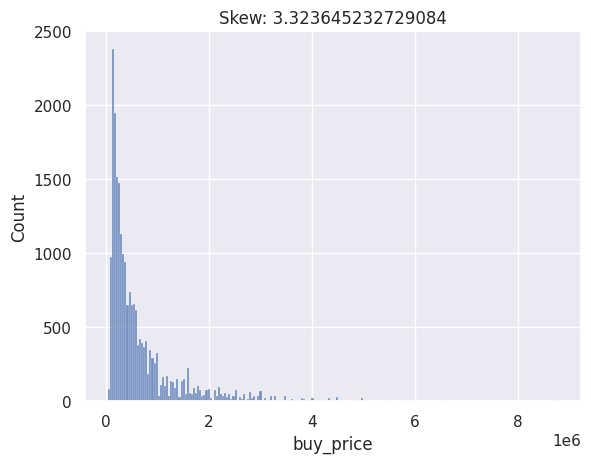

In [32]:
# Target value is not normally distributed
sns.histplot(df['buy_price']).set(title=f"Skew: {df['buy_price'].skew()}")

In [33]:
df.loc[df["n_floors"].notna()].describe()

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,portal,door,rent_price,rent_price_by_area,buy_price,buy_price_by_area,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_private_parking,has_public_parking,parking_price
count,1437.000000,1437.000000,1355.000000,276.000000,1437.000000,1437.000000,1437.000000,1109.000000,0.0,0.0,0.0,0.0,1.437000e+03,0.0,1.437000e+03,1437.000000,796.000000,0.0,0.0,0.0,0.0,0.0,1118.0
mean,10012.014614,11729.985386,431.178598,343.369565,5.330550,4.711204,3.128740,250.836790,NaN,NaN,NaN,NaN,-4.334992e+05,NaN,1.770912e+06,3742.511482,1987.026382,NaN,NaN,NaN,NaN,NaN,0.0
std,4469.207033,4469.207033,210.159303,205.319567,1.794837,1.824689,0.907713,245.295253,NaN,NaN,NaN,NaN,2.537731e+06,NaN,1.283008e+06,1711.353732,20.184571,NaN,NaN,NaN,NaN,NaN,0.0
min,85.000000,2.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,-3.294594e+07,NaN,9.000000e+04,1060.000000,1916.000000,NaN,NaN,NaN,NaN,NaN,0.0
25%,7666.000000,10961.000000,285.500000,209.250000,4.000000,3.000000,2.000000,3.000000,NaN,NaN,NaN,NaN,-6.593300e+04,NaN,8.950000e+05,2610.000000,1975.750000,NaN,NaN,NaN,NaN,NaN,0.0
50%,9129.000000,12613.000000,391.000000,310.500000,5.000000,5.000000,3.000000,244.000000,NaN,NaN,NaN,NaN,-1.225000e+03,NaN,1.450000e+06,3358.000000,1990.000000,NaN,NaN,NaN,NaN,NaN,0.0
75%,10781.000000,14076.000000,550.000000,438.500000,6.000000,6.000000,4.000000,355.000000,NaN,NaN,NaN,NaN,2.012000e+03,NaN,2.300000e+06,4380.000000,2001.000000,NaN,NaN,NaN,NaN,NaN,0.0
max,21740.000000,21657.000000,999.000000,998.000000,24.000000,16.000000,7.000000,997.000000,NaN,NaN,NaN,NaN,2.517000e+03,NaN,8.700000e+06,12500.000000,2022.000000,NaN,NaN,NaN,NaN,NaN,0.0


In [34]:
df['n_bathrooms'].describe()

count    21726.000000
mean         2.091687
std          1.406992
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         16.000000
Name: n_bathrooms, dtype: float64

In [36]:
df_example = df[["has_ac", "has_fitted_wardrobes", "has_garden", "has_pool", "has_terrace", 
    "has_balcony", "has_storage_room", "is_accessible", "has_green_zones"]]



In [87]:
# print(df_example.to_latex(caption="Examples of features with only true values"))

## Preprocessing the data as much as we can here before going into training/testing splits:

In [38]:
# Select/clean features here
# Remove empty/nearly empty/irrelevant/correlated columns


df1 = df.drop(columns=["id", "title", "subtitle", "operation", "latitude", "longitude", "portal", "floor", "door",
    "rent_price_by_area", "are_pets_allowed", "is_furnished", "is_kitchen_equipped", 
    "has_public_parking", "has_private_parking", "sq_mt_useful", "sq_mt_allotment", "raw_address",
    "is_exact_address_hidden", "street_name", "street_number", "is_rent_price_known",
    "is_buy_price_known", "is_renewal_needed", "is_parking_included_in_price", "parking_price",
    "rent_price", "buy_price_by_area", "is_orientation_west", "is_orientation_east", 
    "is_orientation_south", "is_orientation_north", "is_floor_under",
    "is_exterior", "has_lift"])

df1 = df1.loc[:,~df1.columns.str.match("Unnamed: 0")]

# Delete rows with too much missing data
df1.drop(df1[df1["n_rooms"] < df1["n_floors"]].index, inplace=True)

df1.drop(df1[df1["house_type_id"].isnull()].index, inplace=True)
df1.drop(df1[df1["n_rooms"] == 0].index, inplace=True)
df1.drop(df1[df1["built_year"].isnull()].index, inplace=True)
df1.drop(df1[df1["has_central_heating"].isnull()].index, inplace=True)
df1.drop(df1[df1["is_new_development"].isnull()].index, inplace=True)
df1.drop(df1[df1["sq_mt_built"].isnull()].index, inplace=True)

# Fill in missing values with reasonable values
df1.fillna({
    "n_floors": 1, 
    "has_ac": False, 
    "has_fitted_wardrobes" : False, 
    "has_garden" : False, 
    "has_pool" : False, 
    "has_terrace" : False, 
    "has_balcony" : False, 
    "has_storage_room" : False, 
    "is_accessible" : False, 
    "has_green_zones" : False,
    },  inplace=True)

# Cities in Spain are divided into districts which are then divided into neighborhoods.
# Let's make a separate column for district IDs.
df1['district_id'] = df1['neighborhood_id'].str.extract(r'(District \d+)')
df1['district_id'] = df1['district_id'].str.extract(r'(\d+)')
df1['neighborhood_id'] = df1['neighborhood_id'].str.extract(r'(Neighborhood \d+)')
df1['neighborhood_id'] = df1['neighborhood_id'].str.extract(r'(\d+)')

# House types are as follows:
# 1: Apartment/flat
# 2: House or chalet (type of wood house)
# 4: Duplex (double house)
# 5: Penthouses
# Let's also numericize the house_type_id column
df1['house_type_id'] = df1.house_type_id.str.extract(r'(HouseType \d+)')
df1['house_type_id'] = df1.house_type_id.str.extract(r'(\d+)')

# One-hot encode the district, energy certificate, and type IDs so that the ML models don't misinterpret them as continuous number values
df1 = pd.get_dummies(df1, columns=['district_id', 'house_type_id', 'energy_certificate'])

# 
df1.drop(columns=['neighborhood_id'], inplace=True)

# Run this final step on training/testing splits separately to avoid influencing training data with testing data
def preprocess(X):
  X.fillna({"n_bathrooms" : df1['n_bathrooms'].median()}, inplace=True)
  return X


# Show the missing values dataset
# df1.loc[df1.isnull().any(axis=1)]

In [39]:
# Show the dataset
df1

,sq_mt_built,n_rooms,n_bathrooms,n_floors,buy_price,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,has_parking,district_id_1,district_id_10,district_id_11,district_id_12,district_id_13,district_id_14,district_id_15,district_id_17,district_id_18,district_id_19,district_id_2,district_id_20,district_id_21,district_id_3,district_id_4,district_id_5,district_id_6,district_id_7,district_id_8,district_id_9,house_type_id_1,house_type_id_2,house_type_id_4,house_type_id_5,energy_certificate_A,energy_certificate_B,energy_certificate_C,energy_certificate_D,energy_certificate_E,energy_certificate_F,energy_certificate_G,energy_certificate_en trámite,energy_certificate_inmueble exento,energy_certificate_no indicado
5,126.0,4,2.0,1.0,195000,False,1981.0,False,True,False,False,False,False,True,True,False,True,False,True,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9,85.0,2,1.0,1.0,131400,False,1950.0,False,True,False,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
14,64.0,3,1.0,1.0,72000,False,1960.0,False,True,False,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
26,75.0,3,1.0,1.0,138000,False,1984.0,False,True,True,True,False,False,True,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
28,65.0,3,1.0,1.0,150000,False,1976.0,False,True,False,True,False,True,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21731,276.0,4,4.0,4.0,690000,False,2005.0,False,True,True,True,True,True,True,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21732,74.0,2,1.0,1.0,239500,False,1988.0,False,True,False,True,False,True,False,False,False,False,True,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
21737,78.0,2,2.0,1.0,350000,False,2020.0,False,True,True,True,False,False,False,False,True,False,False,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
21738,96.0,2,2.0,1.0,425000,False,2002.0,False,True,True,True,False,True,False,False,True,False,True,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# Setting up the final dataset and defining a function to scale only the non-categorical data:

In [40]:

# df_final = df.iloc[:4000, :][['sq_mt_built', 'rent_price', 'buy_price']].dropna()
# df_short['high_price'] = df_short['buy_price'].apply(lambda x: 1 if x > np.median(df_short['buy_price']) else 0)

df_final = df1.dropna()

X = df_final.drop(columns=['buy_price'])

def scale_features(X):
  # Leave categorical/boolean data intact
  if (np.min(X) == 0 and np.max(X) == 1):
    return X
  else:
    X = X.reshape(-1, 1)
    return StandardScaler().fit_transform(X)





# scaledX = StandardScaler().fit_transform(X)
y = df_final['buy_price']
# y = df_short['high_price'].values
# X2 = X

# for col_label, col_data in X2.items():
#     X2[col_label] = scale_features(col_data.values)
  
# X2
# scaledX

In [41]:
# scaledX[:,5]

In [42]:
# def discretize(y_subset, y, n):
#   quantiles = []
#   i = 0
#   while i <= n:
#     quantiles.append(y.quantile(i / n))
#     i = i + 1
#   return pd.cut(y_subset, bins=quantiles, labels=range(n))

# def discretize(y_subset, y):
#   return pd.cut(y_subset, bins=[0, y.quantile(0.25), y.quantile(0.5), y.quantile(0.75), y.quantile(1)], labels=[0, 1, 2, 3])

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.50, random_state=1234)

# y_train_d = pd.cut(y_train, bins=[0, y.quantile(0.25), y.quantile(0.5), y.quantile(0.75), y.quantile(1)], labels=[0, 1, 2, 3])
# y_test_d = pd.cut(y_test, bins=[0, y.quantile(0.25), y.quantile(0.5), y.quantile(0.75), y.quantile(1)], labels=[0, 1, 2, 3])
# y_test_d.describe()

# Initialize all the models

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

def init_models():
  dt = DecisionTreeClassifier(random_state=1234)
  perceptron = Perceptron(random_state=1234)
  nb = GaussianNB()
  log_reg = LogisticRegression(random_state=1234, solver='liblinear', multi_class='ovr', max_iter=150)
  lin_reg = LinearRegression()
  ridge = Ridge(alpha=0.5, fit_intercept=True, random_state=1234)
  lasso = Lasso(alpha=0.001, max_iter=1200, selection="random", fit_intercept=True, random_state=1234)
  en = ElasticNet(alpha=0.9, fit_intercept=True, random_state=1234)
  svm_linear = svm.SVC(kernel="linear", random_state=1234)
  svm_rbf = svm.SVC(kernel="rbf", random_state=1234)
  gb = HistGradientBoostingClassifier(random_state=1234)
  mlp = MLPClassifier(max_iter=100, solver='adam', early_stopping=True, random_state=1234)
  # svr_poly = svm.SVR(kernel="poly")

  dict_c = {
      "dt": dt,
      "perceptron": perceptron,
      "nb": nb,
      "log_reg": log_reg,
      "svm_linear": svm_linear,
      "svm_rbf": svm_rbf,
      "gb": gb,
      "mlp": mlp,
      # "lin_reg": lin_reg,
      # "ridge": ridge,
      # "lasso": lasso,
      # "ef": ef,
  }

  dict_r = {
      "lin_reg": lin_reg,
      "ridge": ridge,
      "lasso": lasso,
      "en": en,
  }

  return dict_c, dict_r

def init_models_small():
  dt = DecisionTreeClassifier(random_state=1234)
  perceptron = Perceptron(random_state=1234)
  lin_reg = LinearRegression()
  ridge = Ridge(alpha=0.5, fit_intercept=True, random_state=1234)

  dict_c = {
      "dt": dt,
      "perceptron": perceptron
  }

  dict_r = {
      "lin_reg": lin_reg,
      "ridge": ridge
  }
  return dict_c, dict_r



def is_regressor(key):
  return (key in {"lin_reg", "ridge", "lasso", "en"})

# Define more functions to train and test the models:

In [44]:
# Train Models
# m_dict = models dict
# b_dict = best models dict (for easy reference)
def train_models(models, X_train, X_test, y_train, y_test, m_dict, b_dict):
  def get_metrics(model, X_train, y_train):
    scorer = {
        "precision": metrics.make_scorer(metrics.precision_score, average="macro"),
        "recall": metrics.make_scorer(metrics.recall_score, average="macro"),
        "accuracy": metrics.make_scorer(metrics.accuracy_score),
        "f1": metrics.make_scorer(metrics.f1_score, average="macro")
    }
    cv = cross_validate(model, X_train, y_train, cv=10, scoring=scorer, return_train_score=False, return_estimator=True)
    # print(cv)
    best_score_index = cv["test_accuracy"].argmax()
    best = cv["estimator"][best_score_index]
    return cv, best

  def get_metrics_r(model, X_train, y_train):
    scorer = {
        "mae": metrics.make_scorer(metrics.mean_absolute_error),
        "rmse": metrics.make_scorer(metrics.mean_squared_error, squared=False),
        "r2": metrics.make_scorer(metrics.r2_score)
    }
    cv = cross_validate(model, X_train, y_train, cv=10, scoring=scorer, return_train_score=False, return_estimator=True)
    # print(f"CV data: {cv}")
    best_score_index = cv["test_r2"].argmax()
    best = cv["estimator"][best_score_index]
    return cv, best

  for key in models.keys():
    # Logging progress to determine which models are taking the most time to process
    print(f"Training model {key}:")
    # models[key].fit(X_train, y_train)
    # predY = models[key].predict(X_test)
    cv, best = None, None
    # The two model types need to be evaluated in different ways. get_metrics works for classification; get_metrics_r works for regression.
    if is_regressor(key):
      cv, best = get_metrics_r(models[key], X_train, y_train)
    else:
      cv, best = get_metrics(models[key], X_train, y_train)
    m_dict[key] = cv
    b_dict[key] = best

# Test Models
# lc_dict = learning curves
# bp_dict = best predictions
# sc_dict = best training/testing scores
# pi_dict = permutation importances
def test_models(models, X_train, X_test, y_train, y_test, lc_dict, bp_dict, sc_dict, pi_dict):
  for key in models.keys():
    # Logging progress to determine which models are taking the most time to process
    print(f"Testing model {key}:")
    models[key].fit(X_train, y_train)
    predY = models[key].predict(X_test)

    train_score = models[key].score(X_train, y_train)
    test_score = models[key].score(X_test, y_test)
    if is_regressor(key):
      lc = learning_curve(estimator=models[key], X=X_test, y=y_test, shuffle=True, scoring='r2', random_state=1234)
      imp = permutation_importance(models[key], X_test, y_test, scoring='r2', random_state=1234)
    else:
      lc = learning_curve(estimator=models[key], X=X_test, y=y_test, shuffle=True, scoring='accuracy', random_state=1234)
      imp = permutation_importance(models[key], X_test, y_test, scoring='accuracy', random_state=1234)

    lc_dict[key] = lc
    bp_dict[key] = predY
    sc_dict[key] = (train_score, test_score)
    pi_dict[key] = imp

# The main pipeline function, which runs the entire experiment on all training/testing splits and collects all the data for the following figures/tables:

In [45]:
##### Pipeline

''' 
For each sampling:
  Set up the models
  Initialize L: list of LCs (list of training scores + valid scores)
  Initialize M: list of metrics (predicted Y)
  

'''


def pipe(X, y):
  train_sizes = [0.50, 0.70, 0.80]
  # learning_curves and metrics are arrays of 3 dictionaries each.
  # Each dictionary will hold the learning curve and metrics data for each model in each fold. 
  learning_curves = np.array([{}, {}, {}])
  m_metrics = np.array([{}, {}, {}])
  models = ({}, {})
  best_models = {'c': np.array([{}, {}, {}]), 'r': np.array([{}, {}, {}])}
  best_scores = np.array([{}, {}, {}])
  best_predictions = np.array([{}, {}, {}])
  permutation_importances = np.array([{}, {}, {}])
  true_y = []
  true_y_d = []

  for i in range(len(train_sizes)):
    print(f"Begin loop on train size {i}:")
    models = init_models()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_sizes[i], random_state=1234)

    X_train = preprocess(X_train)
    X_test = preprocess(X_test)

    for col_label, col_data in X_train.items():
      X_train[col_label] = scale_features(col_data.values)
    
    for col_label, col_data in X_test.items():
      X_test[col_label] = scale_features(col_data.values)

    y_train_d = pd.cut(y_train, bins=[0, y.quantile(0.25), y.quantile(0.5), y.quantile(0.75), y.quantile(1)], labels=[0, 1, 2, 3])
    y_test_d = pd.cut(y_test, bins=[0, y.quantile(0.25), y.quantile(0.5), y.quantile(0.75), y.quantile(1)], labels=[0, 1, 2, 3])

    true_y.append(y_test)
    true_y_d.append(y_test_d)
    # y_train_d.describe()


    # Test with 1 model
    train_models(models[0], X_train, X_test, y_train_d, y_test_d, m_metrics[i], best_models['c'][i])
    train_models(models[1], X_train, X_test, y_train, y_test, m_metrics[i], best_models['r'][i])
    
    
    # print(learning_curves[i])
    # print(f"Metrics for sample {i}:")
    # print(m_metrics[i])

    # print(f"Best model in sample {i}:")
    # print(best_models['r'][i])

    # Stop at 1 loop with break
    # break

    # Now train the best models on the whole training set
    
    test_models(best_models['c'][i], X_train, X_test, y_train_d, y_test_d, learning_curves[i], best_predictions[i], best_scores[i], permutation_importances[i])
    test_models(best_models['r'][i], X_train, X_test, y_train, y_test, learning_curves[i], best_predictions[i], best_scores[i], permutation_importances[i])

    # print(f"Best prediction data for sample {i}:")
    # print(best_predictions[i])

    
  
  # # Learning curves
  # f, ax = plt.subplots(1, (len(models[0]) + len(models[1])), figsize = (20, 15), sharey=True)
  # ax_idx = 0
  # for m_dict in models:
  #   for key in m_dict:
  #     for j in range(3):
  #       sizes, train_scores, test_scores = learning_curves[j][key]
  #       show_learning_curve(ax[ax_idx], sizes, train_scores, test_scores, key, (j+1))
  #     ax_idx = ax_idx + 1
  
  return learning_curves, m_metrics, best_models, best_predictions, best_scores, true_y, true_y_d, permutation_importances

    


  
  

    


learning_curves, m_metrics, best_models, best_predictions, best_scores, true_y, true_y_d, permutation_importances = pipe(X, y)

Begin loop on train size 0:
Training model dt:
Training model perceptron:
Training model nb:
Training model log_reg:
Training model svm_linear:
Training model svm_rbf:
Training model gb:
Training model mlp:
Training model lin_reg:
Training model ridge:
Training model lasso:


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.601e+13, tolerance: 1.739e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.137e+13, tolerance: 1.780e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.222e+13, tolerance: 1.638e+11

Training model en:
Testing model dt:
Testing model perceptron:
Testing model nb:
Testing model log_reg:
Testing model svm_linear:
Testing model svm_rbf:
Testing model gb:
Testing model mlp:
Testing model lin_reg:
Testing model ridge:
Testing model lasso:


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.764e+13, tolerance: 1.933e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.753e+12, tolerance: 1.457e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.684e+13, tolerance: 5.204e+10

Testing model en:
Begin loop on train size 1:
Training model dt:
Training model perceptron:
Training model nb:
Training model log_reg:
Training model svm_linear:
Training model svm_rbf:
Training model gb:
Training model mlp:
Training model lin_reg:
Training model ridge:
Training model lasso:


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.494e+13, tolerance: 2.419e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.001e+13, tolerance: 2.422e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.313e+13, tolerance: 2.474e+11

Training model en:
Testing model dt:
Testing model perceptron:
Testing model nb:
Testing model log_reg:
Testing model svm_linear:
Testing model svm_rbf:
Testing model gb:
Testing model mlp:
Testing model lin_reg:
Testing model ridge:
Testing model lasso:


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.286e+13, tolerance: 2.718e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.124e+11, tolerance: 7.770e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.830e+12, tolerance: 2.854e+10

Testing model en:
Begin loop on train size 2:
Training model dt:
Training model perceptron:
Training model nb:
Training model log_reg:
Training model svm_linear:
Training model svm_rbf:
Training model gb:
Training model mlp:
Training model lin_reg:
Training model ridge:
Training model lasso:


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.798e+13, tolerance: 2.841e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.742e+13, tolerance: 2.742e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.570e+13, tolerance: 2.796e+11

Training model en:
Testing model dt:
Testing model perceptron:
Testing model nb:
Testing model log_reg:
Testing model svm_linear:
Testing model svm_rbf:
Testing model gb:
Testing model mlp:
Testing model lin_reg:
Testing model ridge:
Testing model lasso:


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.528e+13, tolerance: 3.128e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.051e+11, tolerance: 3.325e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.148e+12, tolerance: 1.802e+10

Testing model en:


In [23]:
pipe_data = (learning_curves, m_metrics, best_models, best_predictions, best_scores, true_y, true_y_d, permutation_importances)

# Checking various data variables to make sure everything got recorded properly:

In [ ]:
# print(permutation_importances[0]['lasso'])

In [89]:
print(learning_curves)

[{'dt': (array([ 302,  982, 1662, 2342, 3023]), array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.99898167, 1.        , 1.        , 1.        , 1.        ],
        [0.99939832, 1.        , 1.        , 1.        , 1.        ],
        [0.99957301, 1.        , 1.        , 1.        , 0.99957301],
        [0.9996692 , 1.        , 0.9996692 , 0.9996692 , 0.9996692 ]]), array([[0.64285714, 0.63492063, 0.64153439, 0.61111111, 0.69403974],
        [0.69444444, 0.69973545, 0.70899471, 0.67195767, 0.74304636],
        [0.72222222, 0.73544974, 0.72619048, 0.69179894, 0.74701987],
        [0.74603175, 0.73015873, 0.72751323, 0.70238095, 0.75629139],
        [0.73677249, 0.7473545 , 0.72883598, 0.70634921, 0.75099338]])), 'perceptron': (array([ 302,  982, 1662, 2342, 3023]), array([[0.74834437, 0.74834437, 0.7218543 , 0.75496689, 0.73509934],
        [0.69450102, 0.73828921, 0.69144603, 0.71894094, 0.71690428],
        [0.66064982, 0.6967509 , 0.69614922, 0.72503008,

In [49]:
# import json

# bm_list = {'c': best_models['c'].tolist(), 'r': best_models['r'].tolist()}
# lc_list = learning_curves.tolist()
# for d in lc_list:
#   for key in d.keys():
#     for a in d[key]:
#       print(a)
# pipe_data_list = (lc_list, bm_list, best_predictions.tolist(), best_scores.tolist())
# with open('data.json', 'w') as f:
#   json.dump(pipe_data_list, f)

In [50]:
print(best_scores)

[{'dt': (1.0, 0.7441121989944429), 'perceptron': (0.6881948120698782, 0.6686954220693305), 'nb': (0.4907358390682901, 0.46679015612595925), 'log_reg': (0.7668078348332451, 0.7501984652024345), 'svm_linear': (0.8268925357331922, 0.8113257475522625), 'svm_rbf': (0.8422445738485972, 0.8028578989150569), 'gb': (0.9933827421916358, 0.8227044191585076), 'mlp': (0.8292747485442032, 0.7991532151362795), 'lin_reg': (0.7935561405923244, 0.8032821928171145), 'ridge': (0.7935554617742726, 0.8032765910450475), 'lasso': (0.793556139559173, 0.8032826230399736), 'en': (0.6952740009474752, 0.7113793759002036)}
 {'dt': (1.0, 0.7469135802469136), 'perceptron': (0.6424654944223861, 0.6318342151675485), 'nb': (0.48534694649272075, 0.4638447971781305), 'log_reg': (0.7666855738324825, 0.7544091710758377), 'svm_linear': (0.8247305728871243, 0.818342151675485), 'svm_rbf': (0.8447721686519191, 0.8108465608465608), 'gb': (0.9797693325770467, 0.8276014109347443), 'mlp': (0.8536585365853658, 0.8170194003527337), '

In [51]:
print(m_metrics)

[{'dt': {'fit_time': array([0.04164934, 0.04290962, 0.04503131, 0.03940368, 0.04005432,
        0.03975177, 0.03752971, 0.03961706, 0.03825688, 0.04432464]), 'score_time': array([0.01228094, 0.01445794, 0.01416874, 0.0144372 , 0.0121901 ,
        0.0131681 , 0.01480222, 0.01355076, 0.01405716, 0.01443195]), 'estimator': [DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234)], 'test_precision': array([0.72069859, 0.75635103, 0.72254296, 0.74945399, 0.72506093,
        0.78495927, 0.77122266, 0.7466159 , 0.73947565, 0.76706854]), 'test_recall': array([0.71659724, 0.74875495, 0.72410866, 0.75099038, 0.72220045,
        0

# Metrics for all individual models on all folds:

Also defining helpful formatting functions ``n_to_split`` and ``key_to_name``:

In [52]:
from IPython.display import HTML
from pandas.io.formats.style import Styler
# Show the performance for every model instance on every training fold

# Columns: Folds
# Rows: Metrics
# Tables: Models
# model_tables = [pd.DataFrame(columns=['Model', 'Precision/RMSE', 'Recall/MAE', 'F1/R2', 'Accuracy'])]

def n_to_split(n):
  if n == 0:
    return "50/50"
  if n == 1:
    return "70/30"
  if n == 2:
    return "80/20"
  else:
    return ""

def key_to_name(key):
  if key == "dt":
    return "Decision Tree"
  if key == "perceptron":
    return "Perceptron"
  if key == "nb":
    return "Naive Bayes"
  if key == "log_reg":
    return "Logistic Regression"
  if key == "svm_linear":
    return "SVM (Linear)"
  if key == "svm_rbf":
    return "SVM (RBF)"
  if key == "gb":
    return "Gradient Boosting"
  if key == "mlp":
    return "Multi-Layer Perceptron"
  if key == "lin_reg":
    return "Linear Regression"
  if key == "ridge":
    return "Ridge"
  if key == "lasso":
    return "Lasso"
  if key == "en":
    return "ElasticNet"
  
  else:
    return ""
  

model_tables = []
captions = []
for sample in range(3):
  model_cols = []
  model_rows = []
  for key in m_metrics[sample]:
    model_cols = []
    model_row = {}
    for fold in range(10):
      model_id = f"{key} {fold+1}"
      model_cols.append(model_id)
    if is_regressor(key):
      model_row = {'RMSE': m_metrics[sample][key]['test_rmse'],
                    'MAE': m_metrics[sample][key]['test_mae'],
                    'R2': m_metrics[sample][key]['test_r2']}
    else:
      model_row = {'Precision': m_metrics[sample][key]['test_precision'],
                    'Recall': m_metrics[sample][key]['test_recall'],
                    'F1': m_metrics[sample][key]['test_f1'],
                    'Accuracy': m_metrics[sample][key]['test_accuracy']}
      # print(model_row['Precision'])
    table = pd.DataFrame(columns=model_cols, data=model_row.values(), index=model_row.keys())
    # Add table caption
    captions.append(f"{n_to_split(sample)} Split, {key_to_name(key)}")
    table = table.round(4)
    model_tables.append(table)
    

# fig, axs = plt.subplots(1, 12, figsize=(20, 15))
# fig.subplots_adjust(wspace=2)
# for i, table in enumerate(model_tables[:12]):
#   # row = i // 4
#   # col = i % 4
#   # print(f"Index: {i}")
#   axs[i].table(cellText = table.values, rowLabels = table.index, 
#          colLabels = table.columns, cellLoc='center',)
#   axs[i].set_title(captions[i])
#   # axs[i].title.set_position((0.5, 1.55))
#   axs[i].axis('off')

# plt.show()



for i, t in enumerate(model_tables):
  t = Styler(t, caption=captions[i], precision=4)
  display(t)
  display(HTML("<br style margin-bottom:50px>"))

,dt 1,dt 2,dt 3,dt 4,dt 5,dt 6,dt 7,dt 8,dt 9,dt 10
Precision,0.7207,0.7564,0.7225,0.7495,0.7251,0.7850,0.7712,0.7466,0.7395,0.7671
Recall,0.7166,0.7488,0.7241,0.7510,0.7222,0.7856,0.7726,0.7486,0.7320,0.7666
F1,0.7182,0.7500,0.7223,0.7500,0.7233,0.7843,0.7713,0.7472,0.7345,0.7656
Accuracy,0.7169,0.7487,0.7249,0.7513,0.7222,0.7857,0.7725,0.7487,0.7321,0.7666


,perceptron 1,perceptron 2,perceptron 3,perceptron 4,perceptron 5,perceptron 6,perceptron 7,perceptron 8,perceptron 9,perceptron 10
Precision,0.5535,0.6316,0.6493,0.6730,0.7101,0.7299,0.7321,0.7261,0.6631,0.6788
Recall,0.5831,0.6521,0.6206,0.6478,0.6695,0.7011,0.7030,0.6804,0.5973,0.6719
F1,0.5274,0.6351,0.5484,0.6495,0.6777,0.7092,0.7034,0.6818,0.6140,0.6572
Accuracy,0.5847,0.6534,0.6190,0.6481,0.6693,0.7011,0.7037,0.6799,0.5968,0.6737


,nb 1,nb 2,nb 3,nb 4,nb 5,nb 6,nb 7,nb 8,nb 9,nb 10
Precision,0.5173,0.5721,0.5757,0.5684,0.5642,0.5720,0.5329,0.5864,0.5353,0.5884
Recall,0.4705,0.4950,0.4925,0.4767,0.4914,0.4863,0.4703,0.4782,0.4576,0.4839
F1,0.3990,0.4364,0.4323,0.4205,0.4353,0.4286,0.4132,0.4218,0.3845,0.4354
Accuracy,0.4735,0.4974,0.4947,0.4788,0.4921,0.4868,0.4709,0.4788,0.4589,0.4854


,log_reg 1,log_reg 2,log_reg 3,log_reg 4,log_reg 5,log_reg 6,log_reg 7,log_reg 8,log_reg 9,log_reg 10
Precision,0.7351,0.7482,0.7090,0.7310,0.7604,0.7816,0.7430,0.7355,0.7267,0.7339
Recall,0.7403,0.7511,0.7138,0.7377,0.7648,0.7833,0.7488,0.7383,0.7241,0.7323
F1,0.7366,0.7424,0.7087,0.7320,0.7576,0.7801,0.7431,0.7309,0.7244,0.7294
Accuracy,0.7407,0.7513,0.7143,0.7381,0.7646,0.7831,0.7487,0.7381,0.7241,0.7321


,svm_linear 1,svm_linear 2,svm_linear 3,svm_linear 4,svm_linear 5,svm_linear 6,svm_linear 7,svm_linear 8,svm_linear 9,svm_linear 10
Precision,0.7985,0.8211,0.8088,0.8156,0.7980,0.8270,0.8168,0.7948,0.8277,0.7824
Recall,0.7960,0.8200,0.8065,0.8172,0.7963,0.8228,0.8174,0.7909,0.8169,0.7827
F1,0.7970,0.8196,0.8072,0.8161,0.7970,0.8240,0.8171,0.7920,0.8194,0.7817
Accuracy,0.7963,0.8201,0.8069,0.8175,0.7963,0.8228,0.8175,0.7910,0.8170,0.7825


,svm_rbf 1,svm_rbf 2,svm_rbf 3,svm_rbf 4,svm_rbf 5,svm_rbf 6,svm_rbf 7,svm_rbf 8,svm_rbf 9,svm_rbf 10
Precision,0.7875,0.7979,0.8014,0.7904,0.7896,0.8275,0.8087,0.7872,0.8206,0.7878
Recall,0.7853,0.7936,0.7960,0.7882,0.7856,0.8227,0.8094,0.7828,0.8089,0.7825
F1,0.7862,0.7943,0.7975,0.7892,0.7868,0.8241,0.8079,0.7834,0.8122,0.7839
Accuracy,0.7857,0.7937,0.7963,0.7884,0.7857,0.8228,0.8095,0.7831,0.8090,0.7825


,gb 1,gb 2,gb 3,gb 4,gb 5,gb 6,gb 7,gb 8,gb 9,gb 10
Precision,0.7781,0.8265,0.7869,0.8084,0.8085,0.8492,0.8351,0.8181,0.8211,0.8239
Recall,0.7772,0.8252,0.7851,0.8092,0.8068,0.8492,0.8359,0.8175,0.8119,0.8224
F1,0.7775,0.8256,0.7854,0.8085,0.8072,0.8485,0.8344,0.8173,0.8133,0.8223
Accuracy,0.7778,0.8254,0.7857,0.8095,0.8069,0.8492,0.8360,0.8175,0.8117,0.8223


,mlp 1,mlp 2,mlp 3,mlp 4,mlp 5,mlp 6,mlp 7,mlp 8,mlp 9,mlp 10
Precision,0.8025,0.8186,0.7744,0.8119,0.7963,0.8184,0.7995,0.7849,0.8091,0.7935
Recall,0.7988,0.8199,0.7746,0.8120,0.7962,0.8123,0.8015,0.7829,0.7985,0.7932
F1,0.8000,0.8188,0.7743,0.8110,0.7961,0.8137,0.8000,0.7829,0.8010,0.7927
Accuracy,0.7989,0.8201,0.7751,0.8122,0.7963,0.8122,0.8016,0.7831,0.7984,0.7931


,lin_reg 1,lin_reg 2,lin_reg 3,lin_reg 4,lin_reg 5,lin_reg 6,lin_reg 7,lin_reg 8,lin_reg 9,lin_reg 10
RMSE,322828.5324,297331.0998,420487.1076,265598.2920,360965.6683,298571.2287,291414.2906,378653.4198,301182.4280,345502.2831
MAE,173473.6905,179472.7513,197629.0582,158383.6799,184723.3413,178616.3651,177077.1270,181215.1349,173488.9231,195091.3607
R2,0.7972,0.7811,0.7708,0.7403,0.7721,0.7926,0.7821,0.7432,0.8234,0.8223


,ridge 1,ridge 2,ridge 3,ridge 4,ridge 5,ridge 6,ridge 7,ridge 8,ridge 9,ridge 10
RMSE,322880.8875,297272.8812,420528.5040,265523.3602,360962.2101,298573.1064,291284.3159,378543.6244,301157.9806,345465.4434
MAE,173451.7877,179367.3619,197555.8889,158318.7119,184627.2243,178545.5429,176942.6563,181022.9466,173316.4159,194964.9832
R2,0.7972,0.7811,0.7707,0.7404,0.7721,0.7926,0.7823,0.7434,0.8234,0.8223


,lasso 1,lasso 2,lasso 3,lasso 4,lasso 5,lasso 6,lasso 7,lasso 8,lasso 9,lasso 10
RMSE,322849.6902,297335.0976,420489.5448,265584.9598,360999.8716,298588.9032,291406.1025,378606.1292,301184.0131,345482.2807
MAE,173499.6956,179473.1367,197632.3304,158373.8971,184713.9401,178625.3080,177071.6754,181211.2484,173485.7538,195094.9617
R2,0.7972,0.7811,0.7708,0.7403,0.7721,0.7925,0.7821,0.7433,0.8234,0.8223


,en 1,en 2,en 3,en 4,en 5,en 6,en 7,en 8,en 9,en 10
RMSE,401985.7591,332753.4163,528160.3266,276267.0632,434839.0887,331965.6395,339024.9050,444618.6382,384476.2526,434654.7165
MAE,212079.1088,198325.0805,236323.7093,179158.3094,218917.4302,194941.6733,202044.2816,210726.1866,204733.5963,232798.1039
R2,0.6856,0.7258,0.6383,0.7190,0.6693,0.7436,0.7050,0.6460,0.7122,0.7187


,dt 1,dt 2,dt 3,dt 4,dt 5,dt 6,dt 7,dt 8,dt 9,dt 10
Precision,0.7461,0.7580,0.7525,0.7118,0.7390,0.7514,0.7739,0.7300,0.7311,0.7431
Recall,0.7426,0.7581,0.7502,0.7089,0.7410,0.7525,0.7733,0.7337,0.7276,0.7422
F1,0.7436,0.7575,0.7508,0.7099,0.7392,0.7516,0.7736,0.7308,0.7288,0.7424
Accuracy,0.7429,0.7580,0.7505,0.7089,0.7410,0.7524,0.7732,0.7335,0.7278,0.7424


,perceptron 1,perceptron 2,perceptron 3,perceptron 4,perceptron 5,perceptron 6,perceptron 7,perceptron 8,perceptron 9,perceptron 10
Precision,0.6629,0.6330,0.6297,0.6448,0.6947,0.6569,0.6798,0.6102,0.5102,0.7111
Recall,0.6236,0.6418,0.6465,0.6635,0.6713,0.6589,0.6495,0.6075,0.5909,0.6795
F1,0.6301,0.6048,0.6142,0.6452,0.6749,0.6148,0.5960,0.5537,0.5115,0.6840
Accuracy,0.6238,0.6408,0.6465,0.6635,0.6711,0.6578,0.6484,0.6068,0.5917,0.6799


,nb 1,nb 2,nb 3,nb 4,nb 5,nb 6,nb 7,nb 8,nb 9,nb 10
Precision,0.5633,0.5729,0.4861,0.5509,0.5900,0.5755,0.5406,0.5454,0.6279,0.5353
Recall,0.4602,0.4808,0.4622,0.4890,0.4947,0.4769,0.4845,0.4618,0.4811,0.4700
F1,0.3944,0.4311,0.3743,0.4254,0.4419,0.4265,0.4150,0.4030,0.4265,0.4020
Accuracy,0.4612,0.4820,0.4631,0.4896,0.4953,0.4764,0.4839,0.4612,0.4820,0.4716


,log_reg 1,log_reg 2,log_reg 3,log_reg 4,log_reg 5,log_reg 6,log_reg 7,log_reg 8,log_reg 9,log_reg 10
Precision,0.7186,0.7602,0.7858,0.7540,0.7214,0.7553,0.7593,0.7406,0.7488,0.7647
Recall,0.7185,0.7583,0.7865,0.7600,0.7278,0.7603,0.7641,0.7472,0.7520,0.7575
F1,0.7156,0.7552,0.7822,0.7533,0.7205,0.7555,0.7593,0.7390,0.7480,0.7562
Accuracy,0.7183,0.7580,0.7864,0.7599,0.7278,0.7599,0.7637,0.7467,0.7524,0.7576


,svm_linear 1,svm_linear 2,svm_linear 3,svm_linear 4,svm_linear 5,svm_linear 6,svm_linear 7,svm_linear 8,svm_linear 9,svm_linear 10
Precision,0.7801,0.8157,0.8400,0.8064,0.8121,0.8078,0.8019,0.8252,0.8235,0.8003
Recall,0.7752,0.8093,0.8393,0.8033,0.8128,0.8074,0.7997,0.8262,0.8165,0.7954
F1,0.7764,0.8100,0.8396,0.8045,0.8121,0.8075,0.8006,0.8250,0.8185,0.7964
Accuracy,0.7750,0.8091,0.8393,0.8034,0.8129,0.8072,0.7996,0.8261,0.8166,0.7955


,svm_rbf 1,svm_rbf 2,svm_rbf 3,svm_rbf 4,svm_rbf 5,svm_rbf 6,svm_rbf 7,svm_rbf 8,svm_rbf 9,svm_rbf 10
Precision,0.7783,0.8193,0.8215,0.8206,0.7914,0.8052,0.8122,0.8175,0.8220,0.8119
Recall,0.7732,0.8148,0.8165,0.8184,0.7900,0.8016,0.8072,0.8167,0.8108,0.8068
F1,0.7748,0.8160,0.8182,0.8192,0.7905,0.8028,0.8089,0.8167,0.8126,0.8081
Accuracy,0.7732,0.8147,0.8166,0.8185,0.7902,0.8015,0.8072,0.8166,0.8110,0.8068


,gb 1,gb 2,gb 3,gb 4,gb 5,gb 6,gb 7,gb 8,gb 9,gb 10
Precision,0.7929,0.8548,0.8437,0.8044,0.8011,0.8137,0.8604,0.8425,0.8366,0.8224
Recall,0.7902,0.8545,0.8429,0.8050,0.8015,0.8130,0.8602,0.8432,0.8354,0.8200
F1,0.7911,0.8543,0.8429,0.8045,0.8010,0.8134,0.8603,0.8422,0.8357,0.8203
Accuracy,0.7902,0.8544,0.8431,0.8053,0.8015,0.8129,0.8601,0.8431,0.8355,0.8201


,mlp 1,mlp 2,mlp 3,mlp 4,mlp 5,mlp 6,mlp 7,mlp 8,mlp 9,mlp 10
Precision,0.7790,0.8228,0.8304,0.8109,0.8026,0.8015,0.8077,0.8165,0.8149,0.8031
Recall,0.7769,0.8206,0.8299,0.8089,0.8034,0.8017,0.8035,0.8167,0.8089,0.7974
F1,0.7777,0.8207,0.8300,0.8097,0.8019,0.8012,0.8049,0.8162,0.8096,0.7983
Accuracy,0.7769,0.8204,0.8299,0.8091,0.8034,0.8015,0.8034,0.8166,0.8091,0.7973


,lin_reg 1,lin_reg 2,lin_reg 3,lin_reg 4,lin_reg 5,lin_reg 6,lin_reg 7,lin_reg 8,lin_reg 9,lin_reg 10
RMSE,337932.2803,322951.1312,286558.1921,301937.4841,390339.0620,335037.9880,258815.2176,297928.2190,362394.0472,340843.3561
MAE,171315.1739,182679.5595,170753.7032,170432.2495,190632.1909,166650.9546,168173.2250,178800.5142,183981.2023,184523.9451
R2,0.7984,0.8130,0.8219,0.7925,0.7715,0.7306,0.8298,0.7942,0.7521,0.8251


,ridge 1,ridge 2,ridge 3,ridge 4,ridge 5,ridge 6,ridge 7,ridge 8,ridge 9,ridge 10
RMSE,337909.4440,322920.4648,286545.5323,301946.7123,390360.5382,334986.6998,258780.1887,297902.3931,362349.5514,340841.3819
MAE,171240.9934,182624.2346,170704.3490,170361.3728,190568.6624,166583.7542,168127.4398,178739.8546,183869.2883,184436.9849
R2,0.7984,0.8130,0.8219,0.7925,0.7715,0.7307,0.8298,0.7942,0.7521,0.8251


,lasso 1,lasso 2,lasso 3,lasso 4,lasso 5,lasso 6,lasso 7,lasso 8,lasso 9,lasso 10
RMSE,337931.4973,322953.2739,286556.6021,301937.4301,390338.1258,335038.9469,258812.6455,297932.0970,362399.3290,340842.0685
MAE,171310.7433,182682.5641,170752.7321,170432.5394,190623.9894,166654.1995,168188.7114,178804.1661,184004.9531,184523.7941
R2,0.7984,0.8130,0.8219,0.7925,0.7715,0.7306,0.8298,0.7941,0.7521,0.8251


,en 1,en 2,en 3,en 4,en 5,en 6,en 7,en 8,en 9,en 10
RMSE,413314.5554,373758.0845,356019.1054,378027.5408,471760.7111,384580.2020,303037.4072,353392.4188,419229.7268,438875.9360
MAE,203932.1283,214032.4919,211179.2123,205364.6466,222734.3844,195350.4789,194771.4139,205382.3786,208799.2487,229558.2731
R2,0.6984,0.7495,0.7251,0.6747,0.6663,0.6450,0.7666,0.7104,0.6682,0.7100


,dt 1,dt 2,dt 3,dt 4,dt 5,dt 6,dt 7,dt 8,dt 9,dt 10
Precision,0.7433,0.7417,0.7711,0.7541,0.7655,0.7769,0.7341,0.7341,0.7682,0.7567
Recall,0.7402,0.7404,0.7685,0.7503,0.7669,0.7799,0.7319,0.7301,0.7699,0.7549
F1,0.7408,0.7409,0.7695,0.7519,0.7659,0.7776,0.7328,0.7317,0.7689,0.7551
Accuracy,0.7405,0.7405,0.7686,0.7504,0.7669,0.7798,0.7318,0.7301,0.7699,0.7550


,perceptron 1,perceptron 2,perceptron 3,perceptron 4,perceptron 5,perceptron 6,perceptron 7,perceptron 8,perceptron 9,perceptron 10
Precision,0.6795,0.6906,0.7080,0.7139,0.6210,0.7059,0.6724,0.7065,0.6565,0.6714
Recall,0.6400,0.6057,0.6297,0.7220,0.6114,0.6366,0.6206,0.7033,0.6672,0.6269
F1,0.6493,0.6104,0.5653,0.7133,0.6077,0.6357,0.6352,0.6978,0.6591,0.6294
Accuracy,0.6397,0.6050,0.6314,0.7223,0.6116,0.6374,0.6209,0.7036,0.6672,0.6275


,nb 1,nb 2,nb 3,nb 4,nb 5,nb 6,nb 7,nb 8,nb 9,nb 10
Precision,0.5512,0.5452,0.5814,0.5248,0.5197,0.5655,0.5673,0.5962,0.6028,0.5429
Recall,0.4723,0.4585,0.4866,0.4736,0.4684,0.4816,0.4832,0.4948,0.4834,0.4660
F1,0.4168,0.3899,0.4339,0.3870,0.4016,0.4200,0.4250,0.4434,0.4277,0.3976
Accuracy,0.4727,0.4595,0.4876,0.4744,0.4694,0.4818,0.4834,0.4950,0.4834,0.4669


,log_reg 1,log_reg 2,log_reg 3,log_reg 4,log_reg 5,log_reg 6,log_reg 7,log_reg 8,log_reg 9,log_reg 10
Precision,0.7599,0.7384,0.7493,0.7797,0.7378,0.7281,0.7473,0.7547,0.7565,0.7543
Recall,0.7621,0.7390,0.7474,0.7835,0.7439,0.7337,0.7520,0.7602,0.7599,0.7465
F1,0.7606,0.7344,0.7436,0.7784,0.7333,0.7275,0.7436,0.7557,0.7542,0.7456
Accuracy,0.7620,0.7388,0.7471,0.7835,0.7438,0.7334,0.7517,0.7599,0.7599,0.7467


,svm_linear 1,svm_linear 2,svm_linear 3,svm_linear 4,svm_linear 5,svm_linear 6,svm_linear 7,svm_linear 8,svm_linear 9,svm_linear 10
Precision,0.8146,0.8108,0.8144,0.8485,0.8018,0.8074,0.8141,0.8318,0.8202,0.7939
Recall,0.8066,0.8067,0.8101,0.8479,0.8016,0.8080,0.8147,0.8310,0.8162,0.7898
F1,0.8092,0.8080,0.8104,0.8481,0.8016,0.8076,0.8143,0.8312,0.8172,0.7904
Accuracy,0.8066,0.8066,0.8099,0.8479,0.8017,0.8079,0.8146,0.8311,0.8162,0.7897


,svm_rbf 1,svm_rbf 2,svm_rbf 3,svm_rbf 4,svm_rbf 5,svm_rbf 6,svm_rbf 7,svm_rbf 8,svm_rbf 9,svm_rbf 10
Precision,0.8060,0.8007,0.8246,0.8328,0.7891,0.7819,0.8013,0.8258,0.8172,0.8155
Recall,0.7916,0.7951,0.8199,0.8314,0.7884,0.7814,0.7980,0.8243,0.8129,0.8113
F1,0.7959,0.7969,0.8210,0.8320,0.7883,0.7816,0.7992,0.8243,0.8135,0.8124
Accuracy,0.7917,0.7950,0.8198,0.8314,0.7884,0.7815,0.7980,0.8245,0.8129,0.8113


,gb 1,gb 2,gb 3,gb 4,gb 5,gb 6,gb 7,gb 8,gb 9,gb 10
Precision,0.8043,0.8182,0.8545,0.8533,0.7995,0.8149,0.8196,0.8567,0.8406,0.8395
Recall,0.7982,0.8164,0.8546,0.8527,0.7998,0.8146,0.8213,0.8559,0.8411,0.8377
F1,0.7999,0.8172,0.8544,0.8527,0.7997,0.8146,0.8201,0.8561,0.8408,0.8382
Accuracy,0.7983,0.8165,0.8545,0.8529,0.8000,0.8146,0.8212,0.8560,0.8411,0.8377


,mlp 1,mlp 2,mlp 3,mlp 4,mlp 5,mlp 6,mlp 7,mlp 8,mlp 9,mlp 10
Precision,0.8114,0.7995,0.8238,0.8509,0.7657,0.8065,0.8098,0.8152,0.8158,0.7984
Recall,0.8015,0.7984,0.8217,0.8512,0.7655,0.8064,0.8081,0.8127,0.8129,0.7947
F1,0.8045,0.7983,0.8210,0.8510,0.7641,0.8064,0.8087,0.8131,0.8133,0.7950
Accuracy,0.8017,0.7983,0.8215,0.8512,0.7653,0.8063,0.8079,0.8129,0.8129,0.7947


,lin_reg 1,lin_reg 2,lin_reg 3,lin_reg 4,lin_reg 5,lin_reg 6,lin_reg 7,lin_reg 8,lin_reg 9,lin_reg 10
RMSE,296415.4068,380683.8371,315416.5513,281233.4576,312988.0398,368454.5484,326482.2596,298736.2887,332392.0499,339130.1504
MAE,167042.7623,179763.6975,177891.3785,169932.2760,174313.3769,180943.3725,174375.9354,180099.7748,174158.9917,186413.1175
R2,0.8149,0.7732,0.8183,0.8212,0.7813,0.7635,0.7955,0.7733,0.7787,0.8179


,ridge 1,ridge 2,ridge 3,ridge 4,ridge 5,ridge 6,ridge 7,ridge 8,ridge 9,ridge 10
RMSE,296412.7192,380685.7977,315399.8043,281207.3336,312974.0459,368461.2070,326498.0778,298696.0826,332350.5449,339137.4791
MAE,166987.1131,179725.8419,177857.3418,169883.4593,174256.9979,180888.4587,174334.2223,180037.0211,174050.8895,186326.4997
R2,0.8149,0.7732,0.8184,0.8212,0.7814,0.7635,0.7955,0.7734,0.7788,0.8179


,lasso 1,lasso 2,lasso 3,lasso 4,lasso 5,lasso 6,lasso 7,lasso 8,lasso 9,lasso 10
RMSE,296415.4060,380669.1985,315419.6979,281225.7256,312986.3464,368454.5755,326501.2723,298733.7123,332392.6037,339134.4975
MAE,167042.7568,179788.6391,177900.0186,169932.5453,174319.1147,180941.8408,174373.7941,180098.0502,174159.3388,186406.8383
R2,0.8149,0.7732,0.8183,0.8212,0.7813,0.7635,0.7955,0.7733,0.7787,0.8179


,en 1,en 2,en 3,en 4,en 5,en 6,en 7,en 8,en 9,en 10
RMSE,366327.6185,464302.9475,368423.8655,348568.5063,367331.9497,443121.8300,400590.7784,337737.1022,391200.8646,432824.1107
MAE,198781.7673,213263.3687,213340.8462,209793.8747,201876.7875,211991.7582,211298.8505,201492.1471,199703.0086,228266.0648
R2,0.7172,0.6626,0.7522,0.7253,0.6988,0.6579,0.6921,0.7103,0.6935,0.7035


In [ ]:
# Format the tables to LaTeX for the report

for i, table in enumerate(model_tables):
  print(table.to_latex(caption=captions[i]))

In [54]:
# f, ax = plt.subplots(3, 1, figsize=(30, 15))

# for sample in range(3):
#   plot_folds = [[]] * 10
#   print(plot_folds)
  
#   for fold in range(10):
#     for key in m_metrics[0]:
#       # print(i)
#       if is_regressor(key):
#         plot_folds[fold].append(m_metrics[sample][key]['test_r2'][fold])
#       else:
#         plot_folds[fold].append(m_metrics[sample][key]['test_accuracy'][fold])
#   width = 0.05
#   bars = []
#   for i in range(10):
#     bars.append([])
#     for j in range(12):
#       bars[i].append(1 + j + width * i)
#   print(len(plot_folds[3]))
  
#   for fold in range(10):
#     ax[sample].bar(bars[fold], plot_folds[fold], width=width, label=f"Fold {fold+1}")
  
#   ax[sample].set_xticks(bars[5], list(m_metrics[0].keys()))
#   ax[sample].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#   ax[sample].set_ylabel(f"Accuracy / R2 Score")
#   ax[sample].set_title(f"Model training scores: {n_to_split(sample)} Split")
#   # ax[sample].ylim(0.6, 0.8)
# plt.show()

In [ ]:
# print(m_metrics[0]['dt'])

# Show the learning curves:

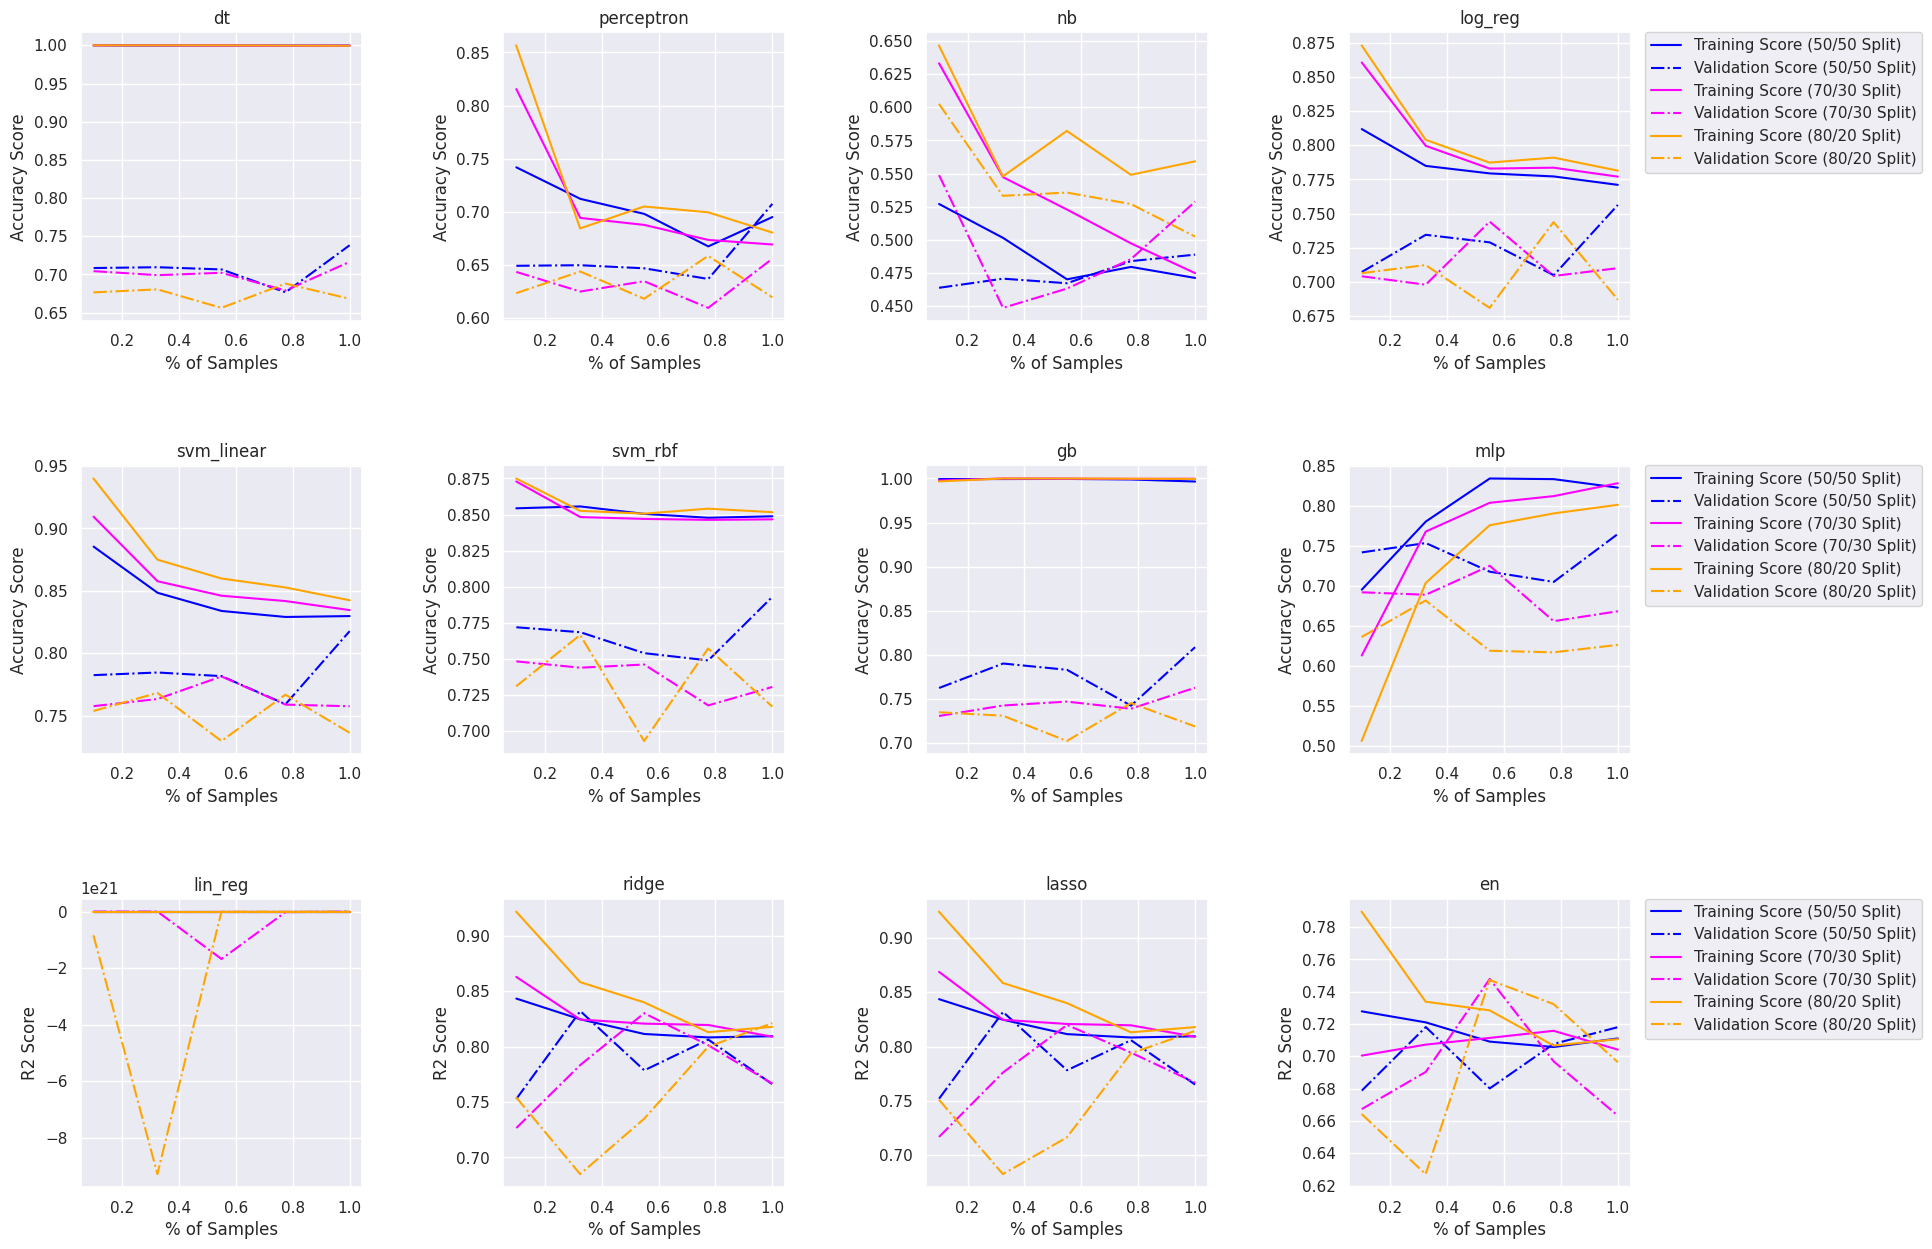

In [57]:
# Learning curves

def show_learning_curve(ax, lc_sizes, train_scores, valid_scores, title, n, metric):
  split = ""
  color = ""
  if n == 0:
    split = "50/50"
    color = "blue"
  if n == 1:
    split = "70/30"
    color = "magenta"
  if n == 2:
    split = "80/20"
    color = "orange"
  max_size = max(lc_sizes)
  train_mean = train_scores.mean(axis=1)
  valid_mean = valid_scores.mean(axis=0)
  ax.plot(lc_sizes / max_size, train_mean, linestyle="solid", color=color, label = f"Training Score ({split} Split)")
  ax.plot(lc_sizes / max_size, valid_mean, linestyle="dashdot", color=color, label = f"Validation Score ({split} Split)")
  ax.set_title(title)
  ax.set_ylabel(metric)
  ax.set_xlabel("% of Samples")


f, ax = plt.subplots(3, 4, figsize = (20, 15))

ax_y = 0
ax_x = 0
for key in learning_curves[0].keys():
  # Fill out one plot
  for sample in range(3):
    sizes, train_scores, test_scores = learning_curves[sample][key]
    metric = "Accuracy Score"
    if is_regressor(key):
      metric = "R2 Score"
    show_learning_curve(ax[ax_y][ax_x], sizes, train_scores, test_scores, key, sample, metric)
  ax_x = ax_x + 1
  if ax_x >= len(ax[ax_y]):
    ax[ax_y][ax_x-1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax_y = ax_y + 1
    ax_x = 0

plt.subplots_adjust(wspace=0.5, hspace=0.5)
# f, ax = plt.subplots(1, (len(models[0]) + len(models[1])), figsize = (20, 15), sharey=True)
  # ax_idx = 0
  # for m_dict in models:
  #   for key in m_dict:
  #     for j in range(3):
  #       sizes, train_scores, test_scores = learning_curves[j][key]
  #       show_learning_curve(ax[ax_idx], sizes, train_scores, test_scores, key, (j+1))
  #     ax_idx = ax_idx + 1

In [ ]:
# print(learning_curves[2]['lin_reg'])

# Defining more functions to help choose the winner:

In [ ]:
# Pick best model

def get_best_metrics(key, sample):
  if is_regressor(key):
    best_index = m_metrics[sample][key]['test_r2'].argmax()
    return {
        'mae': m_metrics[sample][key]['test_mae'][best_index],
        'rmse': m_metrics[sample][key]['test_rmse'][best_index],
        'r2': m_metrics[sample][key]['test_r2'][best_index]
    }
  else:
    best_index = m_metrics[sample][key]['test_accuracy'].argmax()
    return {
        'accuracy': m_metrics[sample][key]['test_accuracy'][best_index],
        'recall': m_metrics[sample][key]['test_recall'][best_index],
        'precision': m_metrics[sample][key]['test_precision'][best_index],
        'f1': m_metrics[sample][key]['test_f1'][best_index]
    }

def get_best_predict(key, sample):
  return best_predictions[sample][key]

model1 = best_models['r'][0]['lin_reg']
best_index = m_metrics[0]['lin_reg']['test_r2'].argmax()
model2 = m_metrics[0]['lin_reg']['estimator'][best_index]
# print(model1 is model2)


best_table = pd.DataFrame()

# print(best_scores[2]['gb'])
# print(get_best_metrics('gb', 2))


        


In [ ]:
# print(best_predictions[0]['gb'])

# Determine the winner:

,Training Metrics,Testing Metrics
Sample,80/20,
Model,Gradient Boosting,
accuracy,0.8560,0.8320
recall,0.8559,0.8312
precision,0.8567,0.8323
f1,0.8561,0.8314


[[328  49   1   0]
 [ 57 267  53   1]
 [  0  34 318  31]
 [  0   0  28 345]]


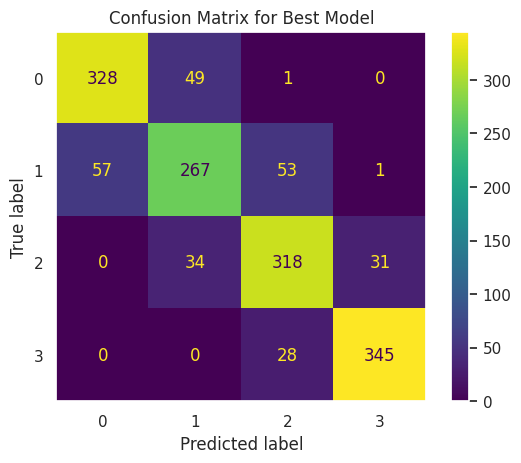

In [90]:
# Find the best model

top3models = []
# def sort_models(m):
#   return m[1]

for d in best_scores:
  max_key = ""
  max_val = 0
  for k in d.keys():
    if d[k][1] > max_val:
      max_val = d[k][1]
      max_key = k
  top3models.append((max_key, max_val))


# top3models.sort(reverse=True, key=sort_models)
# print(top3models)

winner = top3models[0]
for i in range(len(top3models)):
  max_idx = 0
  max_key = ""
  max_val = 0
  if top3models[i][1] > max_val:
    max_idx = i
    max_val = top3models[i][1]
    max_key = top3models[i][0]
  winner = (max_idx, max_key, max_val)
# print("Best model:")
# print(winner)

best_stats = get_best_metrics(winner[1], winner[0])

best_p = get_best_predict(winner[1], winner[0])

m_type = ''
if is_regressor(winner[1]):
  m_type = 'r'
else:
  m_type = 'c'

win_sample = winner[0]
win_key = winner[1]




# for i in range(len(m_metrics[2]['gb']['estimator'])):
#   if winner_model is m_metrics[2]['gb']['estimator'][i]:
#     print(i)
#     break
best_stats['Sample'] = n_to_split(win_sample)
best_stats['Model'] = key_to_name(win_key)

accuracy = metrics.accuracy_score(true_y_d[winner[0]], best_predictions[win_sample][win_key])
precision = metrics.precision_score(true_y_d[win_sample], best_predictions[win_sample][win_key], average="macro")
recall = metrics.recall_score(true_y_d[win_sample], best_predictions[win_sample][win_key], average="macro")
f1 = metrics.f1_score(true_y_d[win_sample], best_predictions[win_sample][win_key], average="macro")

best_stats_table = pd.DataFrame({'Training Metrics': best_stats.values(), 'Testing Metrics': [accuracy, precision, recall, f1, ' ', ' ']}, index=best_stats.keys()).round(4)
best_stats_table = best_stats_table.reindex(['Sample', 'Model', 'accuracy', 'recall', 'precision', 'f1'])

display(Styler(best_stats_table, caption="Best Model", precision=4))

if not is_regressor(winner[1]):
  winner_model = best_models[m_type][winner[0]][winner[1]]
  # print("Best model's CM:")
  cnf_matrix = metrics.confusion_matrix(true_y_d[winner[0]], best_p)
  print(cnf_matrix)

  ax = plt.subplot(1, 1, 1)
  ax.grid(False)
  cnf_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = winner_model.classes_)
  cnf_display.plot(ax=ax)
  ax.set_title("Confusion Matrix for Best Model")
  plt.show()
else:
  pass

In [ ]:
print(best_stats_table.to_latex(caption="Best Model"))

## Verify that the chosen model is the same as the one with the same key and sample in m_metrics:

In [83]:
model1 = winner_model
best_index = m_metrics[2]['gb']['test_accuracy'].argmax()
model2 = m_metrics[2]['gb']['estimator'][best_index]
print(model1 is model2)

True


In [63]:
# There are only two items in each model pipeline. 
# This will quickly get the final estimator from the pipeline without having to know the keys for all the different models used.
# def model_from_pipeline(pline):
#   steps = pline.named_steps
#   for s in steps:
#     if s != 'standardscaler':
#       return pline[s]
    

# real_winner_model = model_from_pipeline(winner_model)

# print(real_winner_model)

# Print the final "big tables":

In [91]:
big_tables = [pd.DataFrame(columns=best_predictions[0].keys(), index=['Precision/RMSE', 'Recall/MAE', 'F1/R2', 'Accuracy'])] * 3

for sample in range(len(big_tables)):
  # big_tables[sample].
  # big_tables[sample]
  # cols = big_tables[sample].columns.tolist()
  # cols = cols[-1:] + cols[:-1]
  # big_tables[sample] = big_tables[sample][cols]

  # Populate each table with the metrics for each model instance belonging to that table's sample
  for key in best_predictions[sample].keys():
    m_list = []
    if is_regressor(key):
      rmse = metrics.mean_squared_error(true_y[sample], best_predictions[sample][key], squared=False)
      mae = metrics.mean_absolute_error(true_y[sample], best_predictions[sample][key])
      r2 = metrics.r2_score(true_y[sample], best_predictions[sample][key])
      m_list = [rmse, mae, r2, None]
    else:
      accuracy = metrics.accuracy_score(true_y_d[sample], best_predictions[sample][key])
      precision = metrics.precision_score(true_y_d[sample], best_predictions[sample][key], average="macro")
      recall = metrics.recall_score(true_y_d[sample], best_predictions[sample][key], average="macro")
      f1 = metrics.f1_score(true_y_d[sample], best_predictions[sample][key], average="macro")
      m_list = [precision, recall, f1, accuracy]
    # print(m_list)
    big_tables[sample][key] = m_list
    # print("Insertion done")
  display(Styler(big_tables[sample], precision=4, caption=f"Best Models: {n_to_split(sample)} Split"))
  display(HTML("<br style margin-bottom:50px>"))
  # print(big_tables[sample].transpose().to_latex(caption=f"Best Models: {n_to_split(sample)} Split"))


# for i, table in enumerate(big_tables):
#   table = table.round(4)
  

# fig, axs = plt.subplots(3, 4, figsize=(10, 5))
# for i, table in enumerate(model_tables):
#   row = i // 4
#   col = i % 4
#   print(f"Index: {i}")
#   axs[row, col].table(cellText = table.values, rowLabels = table.index, 
#          colLabels = table.columns, cellLoc='center')
#   axs[row, col].axis('off')

# plt.show()



,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,en
Precision/RMSE,0.7452,0.6522,0.5483,0.7490,0.8150,0.8095,0.8237,0.8041,316029.6630,316034.1626,316029.3174,382798.0277
Recall/MAE,0.7445,0.6696,0.4685,0.7505,0.8114,0.8030,0.8229,0.7992,172252.0492,172170.2392,172252.4907,204297.3976
F1/R2,0.7448,0.6580,0.4066,0.7467,0.8126,0.8052,0.8233,0.8008,0.8033,0.8033,0.8033,0.7114
Accuracy,0.7441,0.6687,0.4668,0.7502,0.8113,0.8029,0.8227,0.7992,nan,nan,nan,nan


,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,en
Precision/RMSE,0.7475,0.6552,0.5389,0.7516,0.8209,0.8177,0.8284,0.8184,316843.0957,316849.2731,316834.8586,384486.0446
Recall/MAE,0.7473,0.6316,0.4656,0.7548,0.8185,0.8110,0.8278,0.8173,170777.8673,170715.6205,170777.2300,202117.1277
F1/R2,0.7473,0.6145,0.4031,0.7503,0.8194,0.8133,0.8281,0.8178,0.7991,0.7991,0.7992,0.7042
Accuracy,0.7469,0.6318,0.4638,0.7544,0.8183,0.8108,0.8276,0.8170,nan,nan,nan,nan


,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,en
Precision/RMSE,0.7771,0.6802,0.5419,0.7550,0.8139,0.8184,0.8312,0.8167,306900.7081,306909.9984,306900.1995,369914.3016
Recall/MAE,0.7769,0.6765,0.4627,0.7571,0.8124,0.8164,0.8323,0.8187,170024.1118,169980.3990,170035.0854,198599.8068
F1/R2,0.7769,0.6652,0.4001,0.7519,0.8129,0.8173,0.8314,0.8173,0.8032,0.8032,0.8032,0.7141
Accuracy,0.7765,0.6746,0.4597,0.7566,0.8122,0.8161,0.8320,0.8181,nan,nan,nan,nan


In [ ]:
# for i, table in enumerate(big_tables):
#   table = table.round(4)
#   table = table.transpose()
  

In [ ]:
# print(permutation_importances[0]['dt']['importances_mean'])
# print(permutation_importances[1]['dt']['importances_mean'])
# print(permutation_importances[2]['dt']['importances_mean'])

## Print additional tables showing permutation importances:

In [67]:
'''
The first tables show the importances for features that are not the categorical data. There's too many categorical features, so they will be treated in separate tables.
'''

# features = X.columns.to_list()
# print (len(features))

# imp_index = permutation_importances[0]['lasso']['importances_mean']
# print(imp_index)

# max_imp = imp_index.argmax()
# print(f"{features[max_imp]} : {imp_index[max_imp]}")

features = X.columns.to_list()

imp_tables = [pd.DataFrame(columns=best_predictions[0].keys(), index=features[:18])] * 3
for sample in range(3):
  # print(f"Running for sample {sample}:")
  # Populate each table with the importances of each feature for each model
  for key in best_predictions[0].keys():
    imp_index = permutation_importances[sample][key]['importances_mean']
    
    i_list = imp_index[:18]
    # print(m_list)
    # print(f"i_list inserted into table[{sample}][{key}]")
    # print(i_list)
    imp_tables[sample][key] = i_list
    # print(imp_tables[sample][key])
    # print("Insertion done")
  display(Styler(imp_tables[sample], precision=4, caption=f"Feature importances: {n_to_split(sample)} Split"))
  display(HTML("<br style margin-bottom:100px>"))
  # print(imp_tables[sample].to_latex(caption=f"Feature importances: {n_to_split(sample)} Split"))


# for i, table in enumerate(imp_tables):
#   table = table.round(4)
#   display(Styler(table, precision=4, caption=f"Feature importances: {n_to_split(i)} Split"))
#   display(table)
#   display(HTML("<br style margin-bottom:100px>"))



,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,en
sq_mt_built,0.3464,0.2271,0.0263,0.2710,0.3525,0.2313,0.4029,0.2388,1.4763,1.4745,1.4763,0.4300
n_rooms,0.0128,0.0204,-0.0005,0.0276,0.0006,0.0144,0.0127,0.0228,0.0139,0.0139,0.0139,0.0211
n_bathrooms,0.0565,0.0253,0.0171,0.0472,0.1061,0.1410,0.0460,0.1367,0.0547,0.0550,0.0547,0.1758
n_floors,0.0014,0.0033,0.0125,0.0018,0.0038,0.0143,-0.0007,0.0092,0.0073,0.0074,0.0073,0.0007
is_new_development,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
built_year,0.0767,-0.0083,0.0006,-0.0060,0.0013,0.0206,0.0307,0.0043,0.0032,0.0033,0.0032,0.0135
has_central_heating,0.0004,0.0061,0.0024,0.0026,0.0014,0.0017,0.0044,0.0111,51243958117772124160.0000,-0.0001,-0.0000,0.0022
has_individual_heating,0.0188,0.0053,0.0024,0.0018,0.0014,0.0017,-0.0004,0.0038,51243958117728133120.0000,-0.0001,-0.0001,0.0022
has_ac,0.0037,0.0035,-0.0002,0.0017,0.0055,0.0043,0.0084,0.0064,0.0015,0.0016,0.0015,0.0034
has_fitted_wardrobes,0.0042,-0.0023,-0.0005,0.0048,-0.0012,0.0026,0.0012,-0.0010,0.0009,0.0009,0.0009,0.0000


,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,en
sq_mt_built,0.3652,0.2188,0.0237,0.2812,0.3713,0.2482,0.4063,0.3157,1.4580,1.4565,1.4578,0.4236
n_rooms,0.0094,0.0112,0.0004,0.0204,0.0062,0.0129,0.0216,0.0196,0.0124,0.0124,0.0124,0.0215
n_bathrooms,0.0647,0.0231,0.0171,0.0481,0.1132,0.1408,0.0395,0.1184,0.0587,0.0590,0.0588,0.1737
n_floors,-0.0004,-0.0175,0.0121,0.0017,0.0045,0.0134,0.0012,0.0034,0.0068,0.0068,0.0068,0.0010
is_new_development,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
built_year,0.0788,-0.0061,0.0009,-0.0026,0.0007,0.0265,0.0394,0.0065,0.0040,0.0040,0.0040,0.0163
has_central_heating,0.0020,-0.0028,0.0027,0.0034,0.0035,0.0039,0.0076,0.0120,14310619516073458794496.0000,0.0000,0.0000,0.0020
has_individual_heating,0.0219,0.0004,0.0027,0.0031,0.0035,0.0039,-0.0013,0.0074,14310619516077099450368.0000,0.0000,0.0000,0.0020
has_ac,0.0005,0.0024,0.0003,0.0041,0.0066,0.0085,0.0091,0.0068,0.0016,0.0016,0.0016,0.0027
has_fitted_wardrobes,-0.0019,-0.0018,-0.0006,0.0014,-0.0008,-0.0002,0.0011,0.0029,0.0015,0.0015,0.0015,-0.0001


,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,en
sq_mt_built,0.3705,0.2701,0.0238,0.2832,0.3635,0.2607,0.4132,0.2975,1.5221,1.5211,1.5223,0.4322
n_rooms,0.0208,0.0206,0.0009,0.0294,0.0034,0.0130,0.0126,0.0267,0.0133,0.0133,0.0133,0.0236
n_bathrooms,0.0598,0.0556,0.0171,0.0478,0.0952,0.1351,0.0369,0.1220,0.0501,0.0502,0.0500,0.1710
n_floors,-0.0034,-0.0007,0.0108,-0.0004,0.0029,0.0156,0.0003,0.0054,0.0067,0.0068,0.0067,0.0014
is_new_development,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
built_year,0.0958,0.0139,0.0005,0.0029,-0.0004,0.0201,0.0370,0.0126,0.0044,0.0044,0.0044,0.0154
has_central_heating,0.0017,0.0134,0.0017,0.0071,-0.0003,0.0017,0.0054,0.0189,207236981014879731712.0000,0.0001,0.0001,0.0019
has_individual_heating,0.0339,-0.0001,0.0017,0.0048,-0.0003,0.0017,-0.0007,0.0016,207236981015650435072.0000,0.0001,0.0001,0.0019
has_ac,0.0095,0.0073,0.0001,0.0057,0.0032,0.0069,0.0069,0.0063,0.0008,0.0008,0.0008,0.0023
has_fitted_wardrobes,-0.0001,0.0009,-0.0003,0.0008,-0.0038,0.0007,-0.0050,-0.0019,0.0017,0.0017,0.0017,-0.0002


In [68]:
# for i in range(3):
#   table = imp_tables[i].round(4)
#   table = table.transpose()
#   print(table.transpose().to_latex(caption=f"Feature importances: {n_to_split(i)} Split"))

In [92]:
'''
These tables show the most important categorical feature for each category generated during preprocessing.
'''

district_features = features[18:38]
house_features = features[38:42]
energy_features = features[42:]
imp_tables2 = [pd.DataFrame(columns=best_predictions[0].keys(), index=['District', 'Importance', 'House Type', 'Importance', 'Energy Cert', 'Importance'])] * 3
for sample in range(len(imp_tables2)):
  # Populate each table with the importances of each feature for each model
  for key in best_predictions[sample].keys():
    imp_index = permutation_importances[sample][key]['importances_mean']
    max_imp = imp_index[18:38].argmax()
    feature1, imp1 = district_features[max_imp], imp_index[18:38][max_imp]
    max_imp = imp_index[38:42].argmax()
    feature2, imp2 = house_features[max_imp], imp_index[38:42][max_imp]
    max_imp = imp_index[42:].argmax()
    feature3, imp3 = energy_features[max_imp], imp_index[42:][max_imp]


    imp_tables2[sample][key] = [feature1, imp1, feature2, imp2, feature3, imp3]
    # print("Insertion done")
  display(Styler(imp_tables2[sample], precision=4, caption=f"Most important categorical features: {n_to_split(sample)} Split"))
  display(HTML("<br style margin-bottom:100px>"))
  # print(imp_tables2[sample].transpose().to_latex(caption=f"Most important categorical features: {n_to_split(sample)} Split"))


# for i, table in enumerate(imp_tables2):
#   table = table.round(4)
#   display(Styler(table, precision=4, caption=f"Most important categorical features: {n_to_split(i)} Split"))
#   display(HTML("<br style margin-bottom:100px>"))

,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,en
District,district_id_3,district_id_6,district_id_3,district_id_4,district_id_4,district_id_4,district_id_3,district_id_4,district_id_4,district_id_5,district_id_5,district_id_5
Importance,0.0291,0.0261,0.0558,0.0422,0.0577,0.0254,0.0304,0.0444,8970316432365959168.0000,0.0285,0.0298,0.0059
House Type,house_type_id_1,house_type_id_5,house_type_id_2,house_type_id_5,house_type_id_5,house_type_id_5,house_type_id_5,house_type_id_5,house_type_id_1,house_type_id_2,house_type_id_1,house_type_id_1
Importance,0.0044,0.0037,0.0083,0.0016,0.0057,0.0008,0.0030,0.0041,115207194627939811328.0000,0.0018,0.0054,0.0010
Energy Cert,energy_certificate_no indicado,energy_certificate_A,energy_certificate_B,energy_certificate_F,energy_certificate_F,energy_certificate_B,energy_certificate_no indicado,energy_certificate_en trámite,energy_certificate_en trámite,energy_certificate_C,energy_certificate_C,energy_certificate_C
Importance,0.0016,0.0012,0.0021,0.0009,0.0017,0.0011,0.0019,0.0024,1706917956664329984.0000,0.0007,0.0008,0.0002


,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,en
District,district_id_13,district_id_4,district_id_3,district_id_4,district_id_4,district_id_5,district_id_3,district_id_4,district_id_4,district_id_5,district_id_5,district_id_5
Importance,0.0328,0.0301,0.0596,0.0459,0.0667,0.0296,0.0272,0.0569,527360973886768832.0000,0.0285,0.0291,0.0058
House Type,house_type_id_5,house_type_id_5,house_type_id_5,house_type_id_5,house_type_id_5,house_type_id_5,house_type_id_1,house_type_id_5,house_type_id_1,house_type_id_2,house_type_id_1,house_type_id_1
Importance,0.0027,0.0041,0.0065,0.0012,0.0056,0.0033,0.0048,0.0034,22913212436259683696640.0000,0.0038,0.0070,0.0008
Energy Cert,energy_certificate_no indicado,energy_certificate_C,energy_certificate_B,energy_certificate_A,energy_certificate_B,energy_certificate_en trámite,energy_certificate_en trámite,energy_certificate_en trámite,energy_certificate_en trámite,energy_certificate_C,energy_certificate_C,energy_certificate_C
Importance,0.0034,0.0011,0.0028,0.0019,0.0019,0.0023,0.0022,0.0065,339726564927284051968.0000,0.0007,0.0010,0.0003


,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,en
District,district_id_5,district_id_4,district_id_3,district_id_4,district_id_4,district_id_4,district_id_3,district_id_4,district_id_4,district_id_5,district_id_5,district_id_5
Importance,0.0275,0.0319,0.0565,0.0421,0.0569,0.0292,0.0296,0.0503,61419679310516112.0000,0.0287,0.0296,0.0058
House Type,house_type_id_1,house_type_id_5,house_type_id_5,house_type_id_2,house_type_id_5,house_type_id_5,house_type_id_5,house_type_id_5,house_type_id_1,house_type_id_2,house_type_id_1,house_type_id_1
Importance,0.0057,0.0036,0.0060,0.0022,0.0046,0.0045,0.0049,0.0062,7827219086019251929088.0000,0.0033,0.0081,0.0007
Energy Cert,energy_certificate_E,energy_certificate_A,energy_certificate_B,energy_certificate_en trámite,energy_certificate_C,energy_certificate_B,energy_certificate_C,energy_certificate_D,energy_certificate_en trámite,energy_certificate_C,energy_certificate_C,energy_certificate_C
Importance,0.0045,0.0026,0.0021,0.0044,0.0019,0.0019,0.0021,0.0037,19238905167430029312.0000,0.0007,0.0011,0.0003


In [70]:
# for i, table in enumerate(imp_tables2):
#   table = table.round(4)
#   table = table.transpose()
#   print(table.to_latex(caption=f"Most important categorical features: {n_to_split(i)} Split"))

In [93]:
'''
These tables show the single most important feature for each model.
'''

max_imp_tables = [pd.DataFrame(columns=best_predictions[0].keys(), index=['Feature', 'Mean Importance'])] * 3

for sample in range(len(max_imp_tables)):
  # cols = imp_tables[sample].columns.tolist()
  # cols = cols[-1:] + cols[:-1]
  # imp_tables2[sample] = imp_tables2[sample][cols]

  # Populate each table with the most important feature for each model
  for key in best_predictions[sample].keys():
    imp_index = permutation_importances[sample][key]['importances_mean']
    max_imp = imp_index.argmax()
    feature, imp = features[max_imp], imp_index[max_imp]
    i_list = [feature, imp]
    # print(m_list)
    max_imp_tables[sample][key] = i_list
    # print("Insertion done")
  display(Styler(max_imp_tables[sample], caption=f"Most important features: {n_to_split(sample)} Split"))
  display(HTML("<br style margin-bottom:50px>"))
  # print(max_imp_tables[sample].transpose().to_latex(caption=f"Most important features: {n_to_split(sample)} Split"))


# for i, table in enumerate(max_imp_tables):
#   table = table
#   display(Styler(table, caption=f"Most important features: {n_to_split(i)} Split"))
#   display(HTML("<br style margin-bottom:50px>"))

,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,en
Feature,sq_mt_built,sq_mt_built,district_id_3,sq_mt_built,sq_mt_built,sq_mt_built,sq_mt_built,sq_mt_built,house_type_id_1,sq_mt_built,sq_mt_built,sq_mt_built
Mean Importance,0.346388,0.227097,0.055835,0.270971,0.352527,0.231331,0.402858,0.238793,115207194627939811328.000000,1.474503,1.476300,0.430039


,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,en
Feature,sq_mt_built,sq_mt_built,district_id_3,sq_mt_built,sq_mt_built,sq_mt_built,sq_mt_built,sq_mt_built,house_type_id_1,sq_mt_built,sq_mt_built,sq_mt_built
Mean Importance,0.365168,0.218783,0.059612,0.281217,0.371340,0.248236,0.406349,0.315697,22913212436259683696640.000000,1.456495,1.457754,0.423640


,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,en
Feature,sq_mt_built,sq_mt_built,district_id_3,sq_mt_built,sq_mt_built,sq_mt_built,sq_mt_built,sq_mt_built,house_type_id_1,sq_mt_built,sq_mt_built,sq_mt_built
Mean Importance,0.370503,0.270106,0.056481,0.283201,0.363492,0.260714,0.413228,0.297487,7827219086019251929088.000000,1.521120,1.522347,0.432158


In [ ]:
# for i, table in enumerate(max_imp_tables):
#   table = table.round(4)
#   table = table.transpose()
#   print(table.to_latex(caption=f"Most important features: {n_to_split(i)} Split"))

All done!